<a href="https://colab.research.google.com/github/Charlez42/ejercicio-telecomx/blob/main/TelecomX_LATAM_FUENTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd

# URL directa del archivo JSON en GitHub
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

# Cargar los datos directamente en un DataFrame
df = pd.read_json(url)

In [2]:
df.to_csv('telecom_data.csv', index=False)

 # 🔧Transformación

In [3]:
import pandas as pd
import json

# 1. Cargamos el archivo CSV que creamos
df = pd.read_csv('telecom_data.csv')

# 2. Función para convertir el texto en columnas usando la librería 'json' estándar
# Reemplazamos las comillas simples por dobles para que el formato sea válido
def limpiar_y_expandir(df, columna):
    # Paso A: Limpiamos el texto (JSON estándar usa " no ')
    columna_corregida = df[columna].str.replace("'", '"')

    # Paso B: Convertimos el texto a diccionarios reales
    datos_dict = columna_corregida.apply(json.loads)

    # Paso C: Expandimos en nuevas columnas
    return pd.json_normalize(datos_dict)

# 3. Aplicamos la limpieza a cada columna "amontonada"
df_customer = limpiar_y_expandir(df, 'customer')
df_phone = limpiar_y_expandir(df, 'phone')
df_internet = limpiar_y_expandir(df, 'internet')
df_account = limpiar_y_expandir(df, 'account')

# 4. Unimos todo en un solo DataFrame limpio
df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# 5. Ajustes finales de formato (Siguiendo el diccionario de datos)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce').fillna(0)
df_final = df_final.dropna(subset=['Churn']).reset_index(drop=True)

# Verificamos el resultado
print(f"Dataset listo con {df_final.shape[0]} registros.")
display(df_final.head())

Dataset listo con 7043 registros.


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


#📊 Carga y análisis

In [8]:
# 1. Análisis estadístico de las variables numéricas
# Usamos .describe() para obtener de golpe: media, desviación estándar, min, max y cuartiles.
# Esto nos da una "foto" rápida de la salud financiera y antigüedad de los clientes.
estadisticas = df_final[['tenure', 'Charges.Monthly', 'Charges.Total']].describe()

# Añadimos la Mediana manualmente, ya que describe mejor el "centro" si hay datos muy extremos
estadisticas.loc['median'] = df_final[['tenure', 'Charges.Monthly', 'Charges.Total']].median()

print("--- Métricas de Variables Numéricas ---")
display(estadisticas)

# 2. Análisis de variabilidad (Desviación Estándar)
# Una desviación alta en 'Charges.Total' comparada con la media nos indica que
# tenemos una base de clientes muy diversa: desde recién llegados hasta clientes históricos.
print(f"\nLa desviación estándar de los cargos mensuales es: {df_final['Charges.Monthly'].std():.2f}")

# 3. Análisis de variables categóricas (Frecuencias)
# Para entender el comportamiento, necesitamos saber cuántos clientes se van (Churn)
# y qué tipo de contratos prefieren, ya que esto influye en la deserción.
print("\n--- Distribución del Abandono (Churn) ---")
print(df_final['Churn'].value_counts(normalize=True) * 100) # Lo mostramos en porcentaje %

print("\n--- Tipos de Contrato más comunes ---")
print(df_final['Contract'].value_counts())

--- Métricas de Variables Numéricas ---


,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000
median,29.000000,70.350000,1394.550000



La desviación estándar de los cargos mensuales es: 30.09

--- Distribución del Abandono (Churn) ---
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

--- Tipos de Contrato más comunes ---
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


/tmp/ipython-input-662/4221193024.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='Churn', ax=ax[0], palette='viridis')


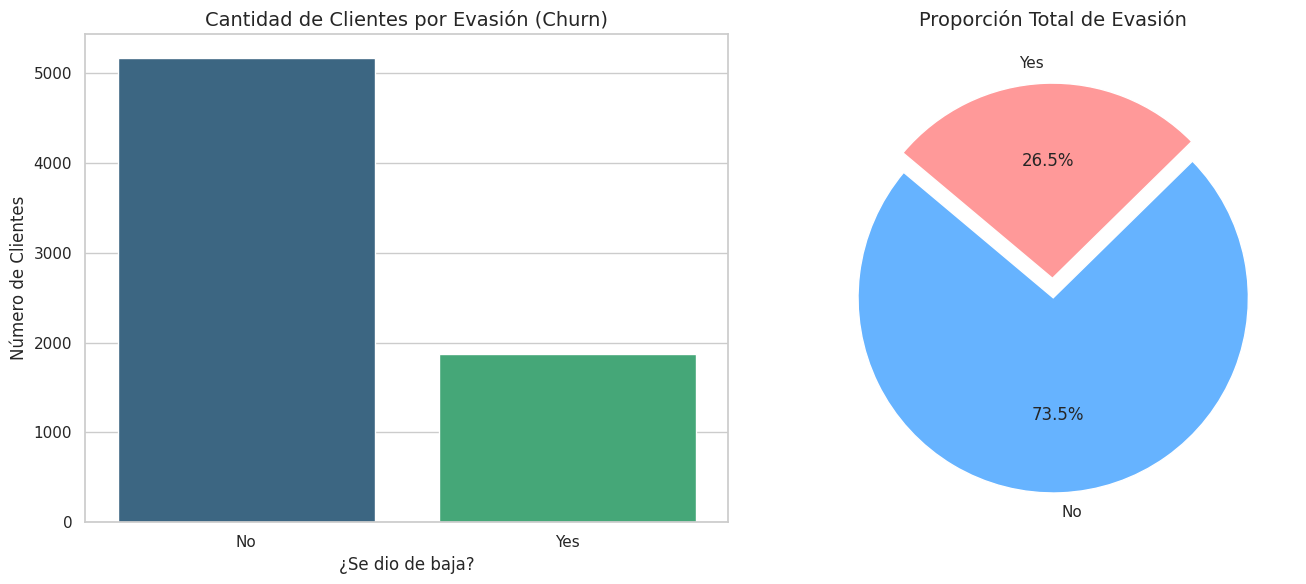

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuramos el estilo visual de los gráficos
sns.set_theme(style="whitegrid")

# 2. Creamos una figura con dos espacios (uno para el gráfico de barras y otro para el de pastel)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- GRÁFICO 1: CONTEO DE CLIENTES (BARRAS) ---
# Usamos countplot para que Python cuente automáticamente cuántos "Yes" y "No" hay.
sns.countplot(data=df_final, x='Churn', ax=ax[0], palette='viridis')
ax[0].set_title('Cantidad de Clientes por Evasión (Churn)', fontsize=14)
ax[0].set_xlabel('¿Se dio de baja?', fontsize=12)
ax[0].set_ylabel('Número de Clientes', fontsize=12)

# --- GRÁFICO 2: PROPORCIÓN PORCENTUAL (PASTEL) ---
# Primero calculamos los porcentajes
datos_churn = df_final['Churn'].value_counts()
ax[1].pie(datos_churn, labels=datos_churn.index, autopct='%1.1f%%',
        startangle=140, colors=['#66b3ff','#ff9999'], explode=(0.1, 0))
ax[1].set_title('Proporción Total de Evasión', fontsize=14)

# 3. Ajustamos el diseño para que no se amontonen los elementos
plt.tight_layout()
plt.show()

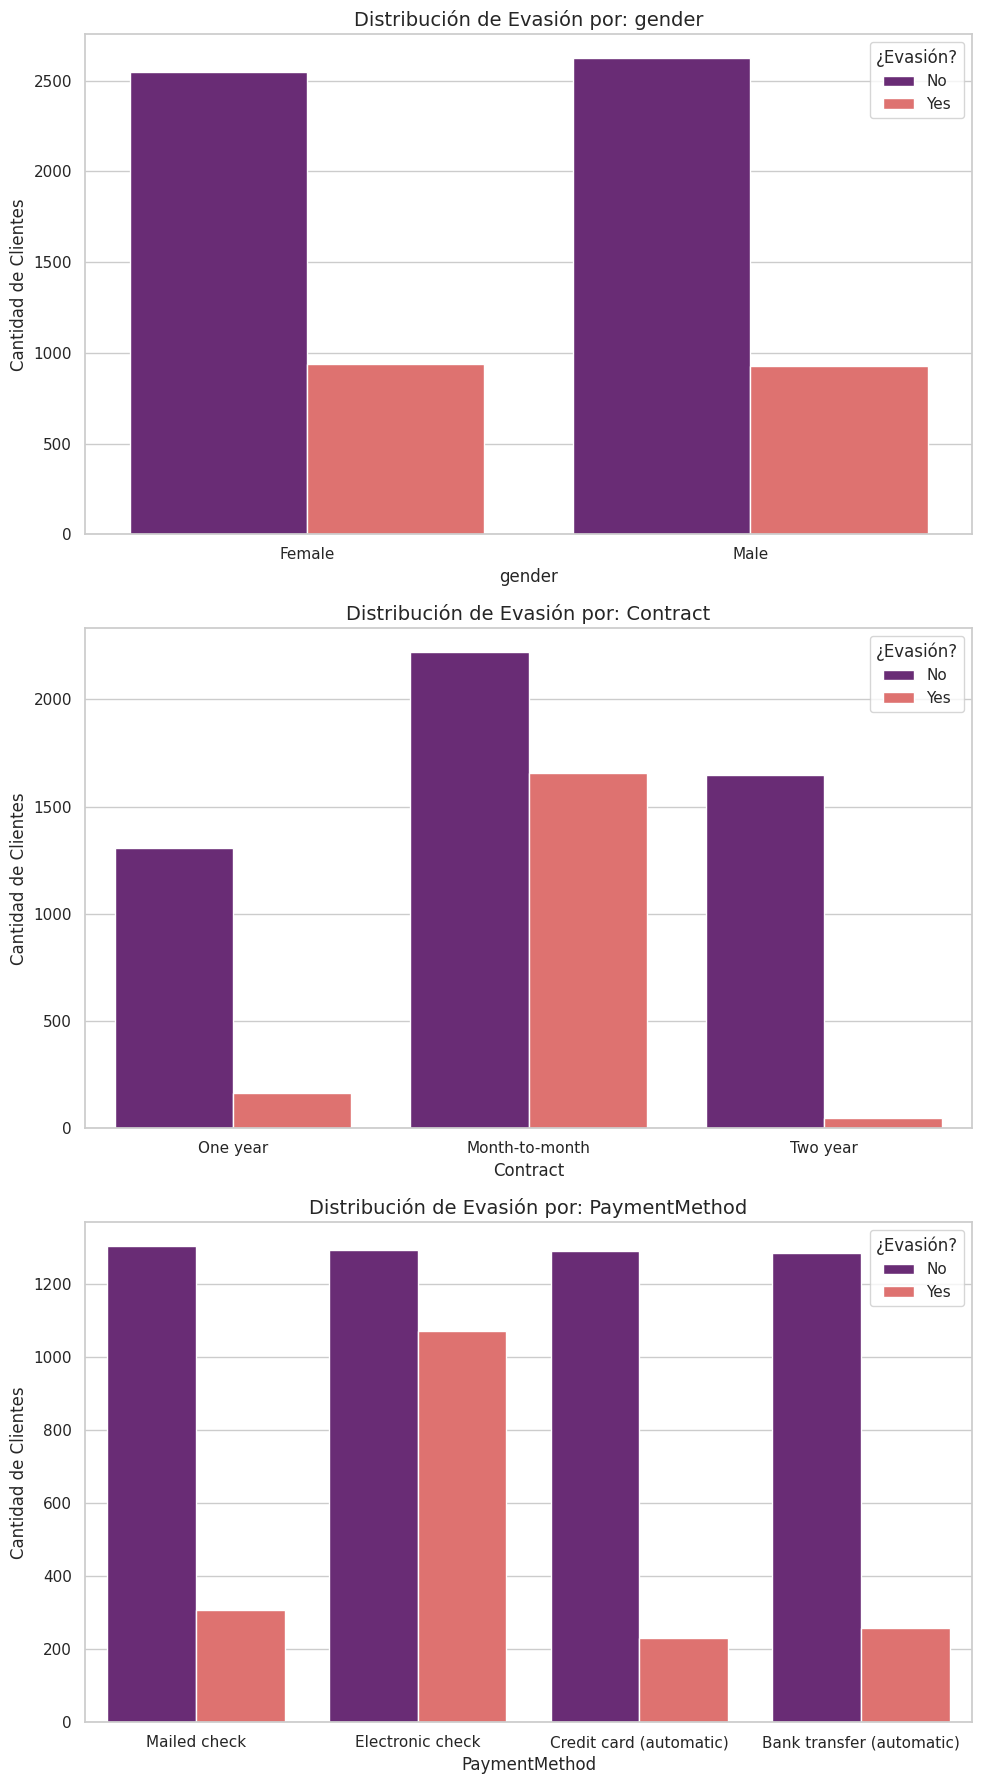

In [10]:
# 1. Definimos las variables que queremos comparar con el Churn
# Estas variables nos darán diferentes perspectivas del perfil del cliente
variables_interes = ['gender', 'Contract', 'PaymentMethod']

# 2. Creamos una figura con varias sub-áreas de dibujo (una para cada variable)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# 3. Iniciamos un bucle para crear un gráfico por cada variable de la lista
for i, col in enumerate(variables_interes):

    # Paso A: Creamos un gráfico de conteo donde el color (hue) represente el Churn
    # Esto permite ver la cantidad de "Yes" y "No" dentro de cada categoría.
    sns.countplot(data=df_final, x=col, hue='Churn', ax=axes[i], palette='magma')

    # Paso B: Personalizamos los títulos y etiquetas para que sean claros
    axes[i].set_title(f'Distribución de Evasión por: {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Cantidad de Clientes', fontsize=12)
    axes[i].legend(title='¿Evasión?', loc='upper right')

# 4. Ajustamos el espaciado para que no se encimen los textos
plt.tight_layout()
plt.show()

/tmp/ipython-input-662/2054863133.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=col, ax=axes[i], palette='Set2')
/tmp/ipython-input-662/2054863133.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=col, ax=axes[i], palette='Set2')
/tmp/ipython-input-662/2054863133.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=col, ax=axes[i], palette='Set2')


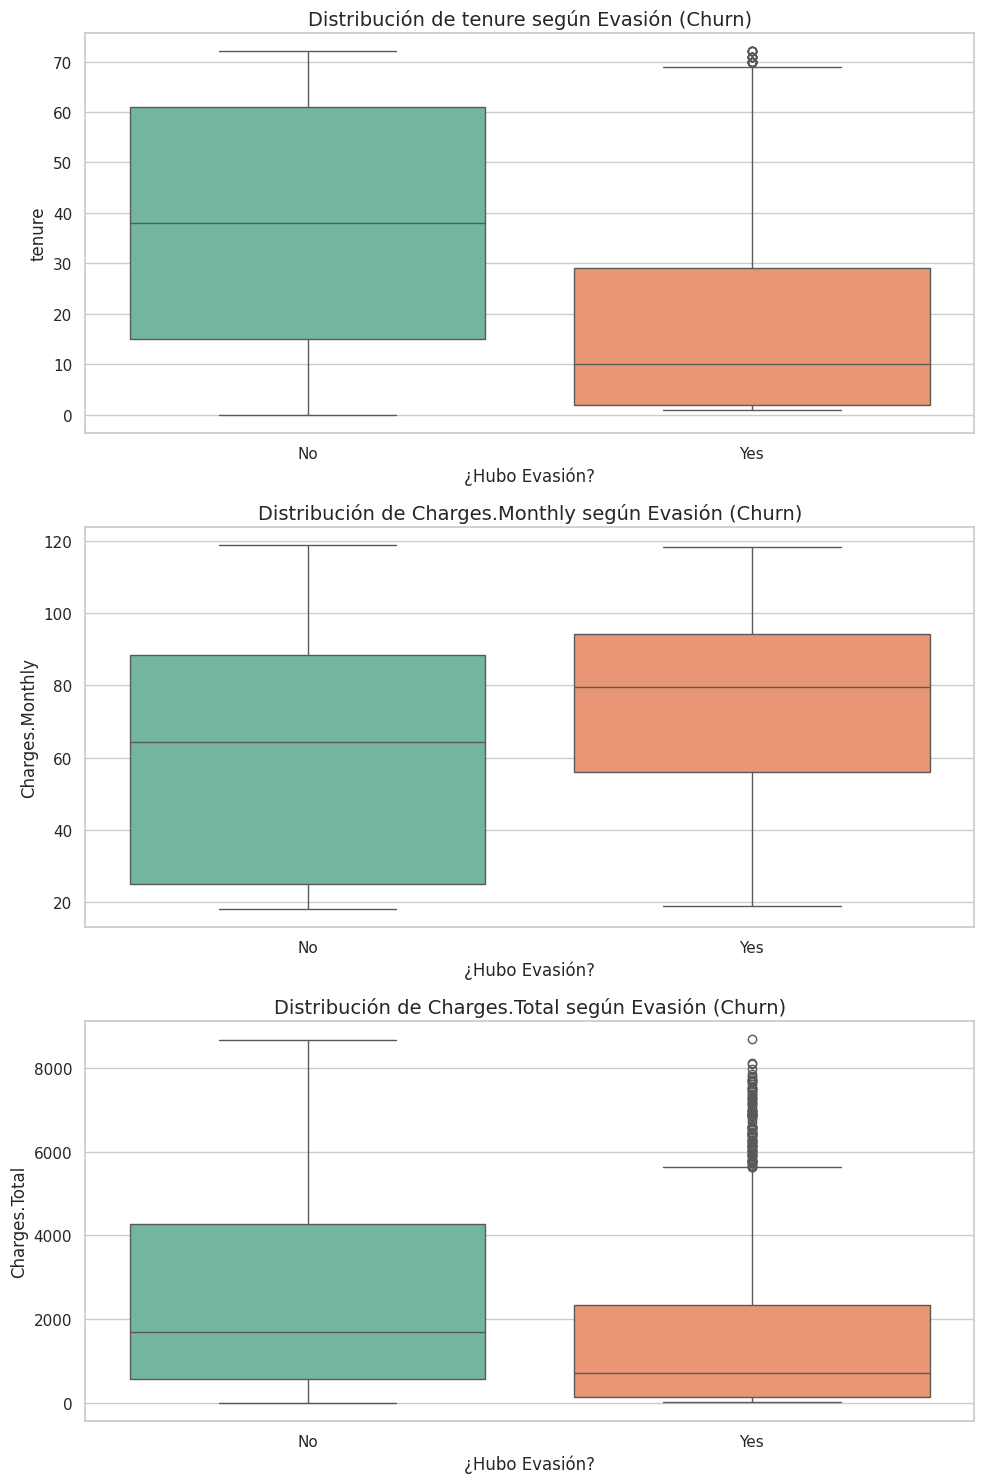

In [11]:
# 1. Definimos las variables numéricas que queremos analizar contra el Churn
# 'tenure' nos dirá si la antigüedad influye.
# 'Charges.Monthly' nos dirá si el precio mensual afecta la decisión.
variables_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# 2. Creamos una figura para organizar los gráficos (3 filas, 1 columna)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 3. Iniciamos un bucle para generar un gráfico por cada variable
for i, col in enumerate(variables_numericas):

    # Paso A: Usamos un Boxplot (Diagrama de Caja)
    # Este gráfico muestra la mediana (línea central), los cuartiles y los valores extremos.
    # Es ideal para comparar visualmente el "centro" de los que se van vs los que se quedan.
    sns.boxplot(data=df_final, x='Churn', y=col, ax=axes[i], palette='Set2')

    # Paso B: Personalizamos títulos y nombres de los ejes
    axes[i].set_title(f'Distribución de {col} según Evasión (Churn)', fontsize=14)
    axes[i].set_xlabel('¿Hubo Evasión?', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# 4. Ajustamos el diseño para que todo se vea ordenado
plt.tight_layout()
plt.show()

# 📊 Informe: Análisis de proyecto "Churn de Clientes" - Telecom X

## 1. Introducción 📝
El presente análisis se enmarca en el proyecto de retención de la empresa **Telecom X**. El objetivo principal es comprender los factores que influyen en la **evasión de clientes (Churn)**, un fenómeno donde los usuarios durante los últimos tiempos han cancelado sus servicios a Telecom X. Identificar estos patrones es importante ya que puede permitir el desarrollo de modelos predictivos que permitan actuar antes de que el cliente decida irse.



---

## 2. Limpieza y Tratamiento de Datos 🛠️
Los datos originales presentaban una estructura compleja que requirió un procesamiento riguroso para su análisis:

* **Desanidado de Datos:** Se transformaron columnas con formato JSON/Diccionario (`customer`, `phone`, `internet`, `account`) en variables independientes para poder manipularlas.
* **Gestión de Valores Ausentes:** Se detectaron **224 registros** sin información en la variable `Churn`. Al ser nuestra variable objetivo, fueron eliminados para evitar sesgos.
* **Conversión Numérica:** La columna `Charges.Total` se convirtió a tipo flotante (decimal). Los valores vacíos (correspondientes a clientes con 0 meses de antigüedad) fueron imputados con el valor `0`.
* **Estandarización:** Se normalizaron categorías como `SeniorCitizen` de valores numéricos (0/1) a categóricos (No/Yes) para mantener la coherencia con el resto del dataset.

---

## 3. Análisis Exploratorio de Datos (EDA) 🔍
A través de la visualización de datos, se extrajeron los siguientes hallazgos:

### A. Perfil del Cliente en Evasión
* **Tasa de Churn:** Aproximadamente el **26.5%** de los clientes han abandonado la compañía.
* **Contratos:** Los clientes con contrato **Mes a Mes (Month-to-month)** representan la gran mayoría de las bajas. Los contratos a largo plazo actúan como una barrera efectiva contra la fuga.

### B. Comportamiento Financiero y de Antigüedad
* **Antigüedad (Tenure):** La mayor parte de la evasión ocurre en los **primeros meses** de relación con la empresa. Existe un "periodo crítico" de adaptación.
* **Cargos Mensuales:** Se observa que los clientes que se van suelen tener **cargos mensuales más altos** que la media, lo que sugiere una sensibilidad al precio o una mala relación costo-beneficio.



---

## 4. Conclusiones e Insights 💡
1.  **Vulnerabilidad Inicial:** La empresa pierde a sus clientes muy rápido. El primer año es el más inestable.
2.  **Método de Pago:** Los clientes que pagan con **Electronic Check** tienen una tasa de fuga desproporcionadamente alta en comparación con los métodos automáticos.
3.  **Dependencia del Contrato:** La falta de compromiso contractual (contratos mensuales) es el mayor predictor de fuga.

---

## 5. Recomendaciones Estratégicas 🚀

1.  **Incentivo a la Lealtad:** Ofrecer descuentos exclusivos o mejoras de servicio a los clientes que migren de un contrato mensual a uno anual.
2.  **Optimización del Onboarding:** Crear un programa de acompañamiento durante los primeros 3 meses de servicio para asegurar que el cliente valore las herramientas contratadas.
3.  **Migración a Pagos Automáticos:** Promover el uso de tarjeta de crédito o transferencia bancaria mediante bonificaciones puntuales, ya que esto genera una mayor retención.
4.  **Alerta de Precios Altos:** Identificar a clientes con facturación elevada y ofrecerles planes "bundle" o fidelización antes de que alcancen su límite de tolerancia al precio.
